# Network Traffic Classification

In [1]:
# Basic data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    classification_report,
    confusion_matrix,
    cohen_kappa_score
)

# Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#import dataset

In [2]:
data = pd.read_csv("/content/Midterm_53_group.csv")
data.head(5)

,Time,Source,No.,Destination,Protocol,Length,Info
0,0.000000,192.167.8.166,1,192.167.255.255,NBNS,92,Name query NB WPAD<00>
1,0.784682,192.167.8.166,2,192.167.255.255,NBNS,92,Name query NB WPAD<00>
2,1.169060,VMware_8a:5c:e6,3,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1
3,2.167949,VMware_8a:5c:e6,4,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1
4,3.170095,VMware_8a:5c:e6,5,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1


In [3]:
data.columns

Index(['Time', 'Source', 'No.', 'Destination', 'Protocol', 'Length', 'Info'], dtype='object')

In [4]:
data.dtypes

,0
Time,float64
Source,object
No.,int64
Destination,object
Protocol,object
Length,int64
Info,object


In [5]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 394136 rows and 7 columns


In [6]:
unique_src_ip_count = data['Source'].nunique()
unique_dst_ip_count = data['Destination'].nunique()

print(f"Number of unique source IPs: {unique_src_ip_count}")
print(f"Number of unique destination IPs: {unique_dst_ip_count}")

Number of unique source IPs: 372
Number of unique destination IPs: 308


## Data analysis

### Subtask:
Analyze the dataset to identify relationships between variables, focusing on the 'Length' column.


In [8]:
## Data analysis
# Descriptive statistics for 'Length'
length_stats = data['Length'].describe()
print("Descriptive Statistics for 'Length':\n", length_stats)

# Grouped statistics by 'Protocol'
protocol_stats = data.groupby('Protocol')['Length'].describe()
print("\nDescriptive Statistics for 'Length' by Protocol:\n", protocol_stats)

# Grouped statistics by 'Destination' (top 10 destinations)
top_destinations = data['Destination'].value_counts().nlargest(10).index
destination_stats = data[data['Destination'].isin(top_destinations)].groupby('Destination')['Length'].describe()
print("\nDescriptive Statistics for 'Length' by Top 10 Destinations:\n", destination_stats)

# Investigate potential outliers
print("\nPotential Outliers:")
print(data['Length'].quantile([0.95, 0.99, 0.999]))

# Explore correlations (categorical features)
print("\nCorrelation with Categorical Features:")
for col in ['Protocol', 'Destination']:
    correlation = data.groupby(col)['Length'].mean()
    print(f"\nAverage Length by {col}:\n{correlation}")

# Further examination of potential outliers
outliers = data[data['Length'] > data['Length'].quantile(0.999)]
print("\nExtreme Outliers (Length > 99.9th percentile):\n", outliers)

Descriptive Statistics for 'Length':
 count    394136.000000
mean        985.577027
std         837.371336
min          42.000000
25%          60.000000
50%        1462.000000
75%        1514.000000
max       49745.000000
Name: Length, dtype: float64

Descriptive Statistics for 'Length' by Protocol:
              count         mean          std     min     25%     50%     75%  \
Protocol                                                                       
ARP          447.0    56.134228     7.400149    42.0    60.0    60.0    60.0   
BROWSER        8.0   243.000000     0.000000   243.0   243.0   243.0   243.0   
DHCP          17.0   354.352941    12.757063   339.0   339.0   364.0   364.0   
DNS         1999.0   128.808404    74.316147    63.0    79.0    96.0   158.5   
HTTP           3.0   320.000000     0.000000   320.0   320.0   320.0   320.0   
ICMP        2690.0    93.509294    13.589124    60.0    98.0    98.0    98.0   
ICMPv6         9.0    86.000000     0.000000    86.0    86

## Data visualization

### Subtask:
Visualize the data distributions and relationships between variables, focusing on the 'Length' column.


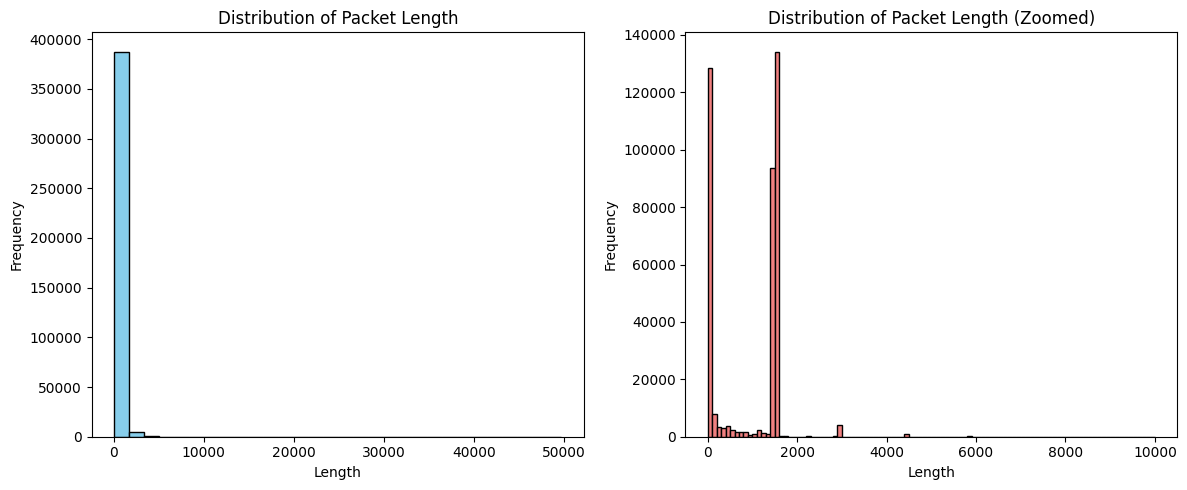

In [10]:
# Histogram plots
plt.figure(figsize=(12, 5))

# Full range histogram
plt.subplot(1, 2, 1)
plt.hist(data['Length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Packet Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Zoomed-in histogram
plt.subplot(1, 2, 2)
plt.hist(data['Length'], bins=100, range=(0, 10000), color='lightcoral', edgecolor='black')
plt.title('Distribution of Packet Length (Zoomed)')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


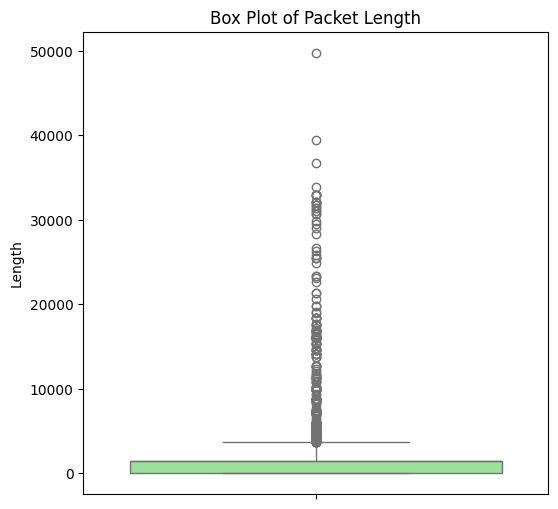

In [11]:
# Box plot for packet length
plt.figure(figsize=(6, 6))
sns.boxplot(y=data['Length'], color='lightgreen')
plt.title('Box Plot of Packet Length')
plt.ylabel('Length')
plt.show()


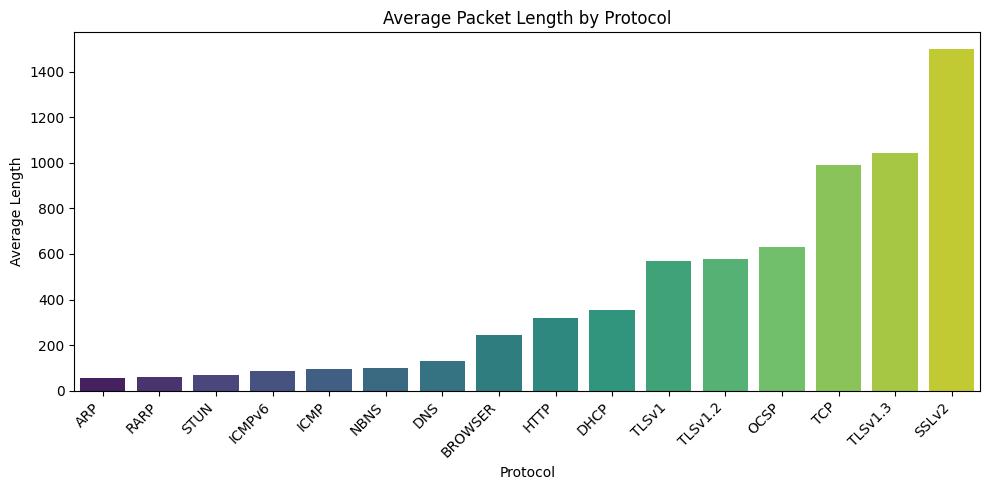

In [12]:
# Average length by protocol
protocol_length = data.groupby('Protocol')['Length'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=protocol_length.index, y=protocol_length.values, palette="viridis")
plt.title('Average Packet Length by Protocol')
plt.xlabel('Protocol')
plt.ylabel('Average Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


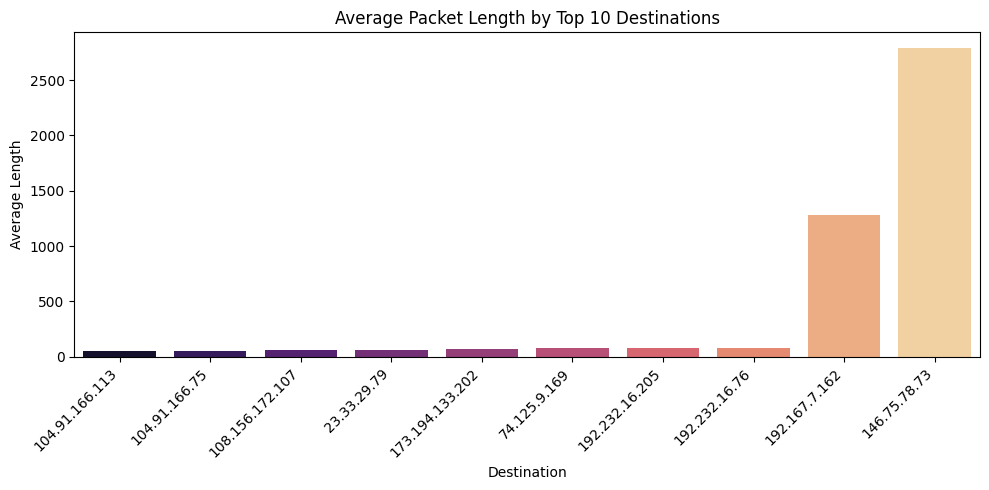

In [14]:
# Top 10 most frequent destinations
top_destinations = data['Destination'].value_counts().nlargest(10).index
destination_length = data[data['Destination'].isin(top_destinations)].groupby('Destination')['Length'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=destination_length.index, y=destination_length.values, palette="magma")
plt.title('Average Packet Length by Top 10 Destinations')
plt.xlabel('Destination')
plt.ylabel('Average Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##Encode Categorical Columns

In [16]:
label_encoders = {}
for col in ['Source', 'Destination', 'Protocol']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


##Quantile-Based Binning for Length

In [17]:
# Calculate 33% and 66% quantiles
q1 = data['Length'].quantile(0.33)
q2 = data['Length'].quantile(0.66)

print(f"Quantile thresholds:\nLow: ≤ {q1:.2f}\nMedium: ≤ {q2:.2f}\nHigh: > {q2:.2f}")


Quantile thresholds:
Low: ≤ 118.00
Medium: ≤ 1514.00
High: > 1514.00


##Categorize Length into Classes

In [19]:
# Function to assign categories
def categorize_length(length):
    if length <= q1:
        return 'Low'
    elif length <= q2:
        return 'Medium'
    else:
        return 'High'

# Apply categorization
data['Label'] = data['Length'].apply(categorize_length)


##Encode Labels

In [20]:
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])  # 0: Low, 1: Medium, 2: High

# Display label distribution
print("\nLabel distribution:\n", data['Label'].value_counts())



Label distribution:
 Label
2    256809
1    130513
0      6814
Name: count, dtype: int64


## Split Data for Training

In [21]:

# Define features and labels
X = data[['Source', 'Destination', 'Protocol', 'Length']]
y = data['Label']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


## Naive Bayes Algorithm

In [26]:

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
accuracy = accuracy_score(pred, y_test)
precision = precision_score(y_test, pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print(classification_report(y_test,pred, labels=None))
cm=confusion_matrix(y_test, pred)
print(cm)

Accuracy: 0.9700442316962813
Precision: 0.9874455301970794
              precision    recall  f1-score   support

           0       0.38      1.00      0.55      2044
           1       1.00      0.97      0.98     39154
           2       1.00      0.97      0.98     77043

    accuracy                           0.97    118241
   macro avg       0.79      0.98      0.84    118241
weighted avg       0.99      0.97      0.98    118241

[[ 2044     0     0]
 [ 1068 37882   204]
 [ 2262     8 74773]]


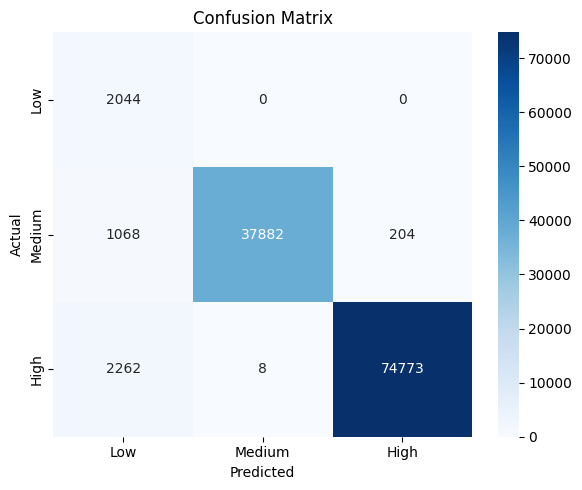

In [28]:

# Confusion matrix
cm = confusion_matrix(y_test, pred)
labels = ['Low', 'Medium', 'High']  # Adjust based on how your label_encoder encoded them

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [29]:
accuracy = accuracy_score(y_test, pred)
print("Correct Accuracy:", accuracy)


Correct Accuracy: 0.9700442316962813


## K-Neighbors Algorithm

--- K-Nearest Neighbors (k=3) ---
Accuracy: 0.9999492561801744
Precision: 0.9999492605246547
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2044
           1       1.00      1.00      1.00     39154
           2       1.00      1.00      1.00     77043

    accuracy                           1.00    118241
   macro avg       1.00      1.00      1.00    118241
weighted avg       1.00      1.00      1.00    118241

Confusion Matrix:
 [[ 2044     0     0]
 [    0 39152     2]
 [    1     3 77039]]


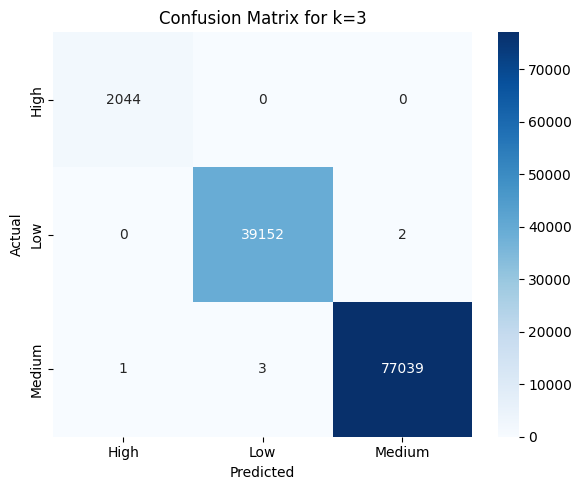

--- K-Nearest Neighbors (k=6) ---
Accuracy: 0.9998562258438274
Precision: 0.9998562684014356
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2044
           1       1.00      1.00      1.00     39154
           2       1.00      1.00      1.00     77043

    accuracy                           1.00    118241
   macro avg       1.00      1.00      1.00    118241
weighted avg       1.00      1.00      1.00    118241

Confusion Matrix:
 [[ 2043     0     1]
 [    0 39152     2]
 [    3    11 77029]]


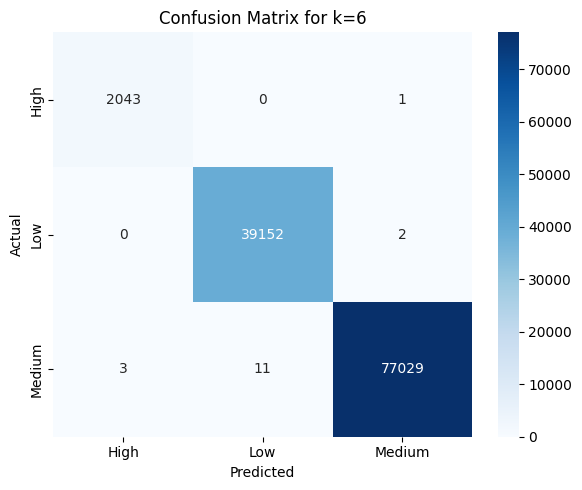

--- K-Nearest Neighbors (k=9) ---
Accuracy: 0.9998646831471317
Precision: 0.9998647029567524
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2044
           1       1.00      1.00      1.00     39154
           2       1.00      1.00      1.00     77043

    accuracy                           1.00    118241
   macro avg       1.00      1.00      1.00    118241
weighted avg       1.00      1.00      1.00    118241

Confusion Matrix:
 [[ 2043     0     1]
 [    0 39151     3]
 [    0    12 77031]]


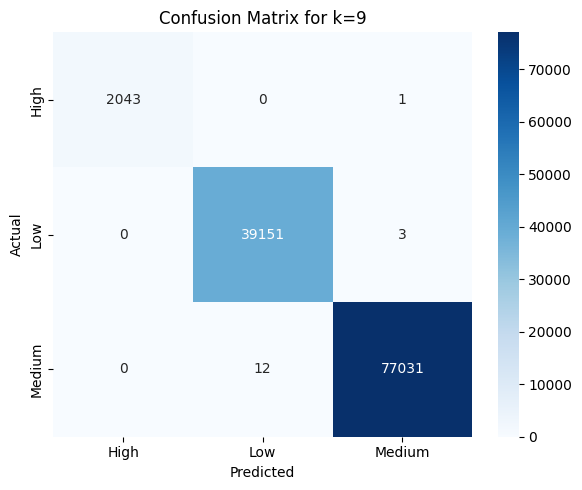

--- K-Nearest Neighbors (k=12) ---
Accuracy: 0.9997801101140891
Precision: 0.9997801838193892
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2044
           1       1.00      1.00      1.00     39154
           2       1.00      1.00      1.00     77043

    accuracy                           1.00    118241
   macro avg       1.00      1.00      1.00    118241
weighted avg       1.00      1.00      1.00    118241

Confusion Matrix:
 [[ 2043     0     1]
 [    0 39151     3]
 [    1    21 77021]]


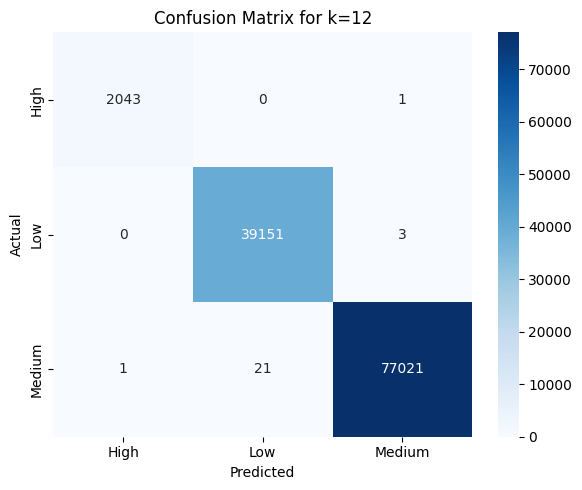

In [30]:
for i in range(3, 15, 3):
    print(f"--- K-Nearest Neighbors (k={i}) ---")

    # Model training
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Classification Report:\n", classification_report(y_test, pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, pred)
    print("Confusion Matrix:\n", cm)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for k={i}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


## Decision Tree

Decision Tree Classifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2044
           1       1.00      1.00      1.00     39154
           2       1.00      1.00      1.00     77043

    accuracy                           1.00    118241
   macro avg       1.00      1.00      1.00    118241
weighted avg       1.00      1.00      1.00    118241

Accuracy: 1.0
Precision: 1.0
Confusion Matrix:
 [[ 2044     0     0]
 [    0 39154     0]
 [    0     0 77043]]


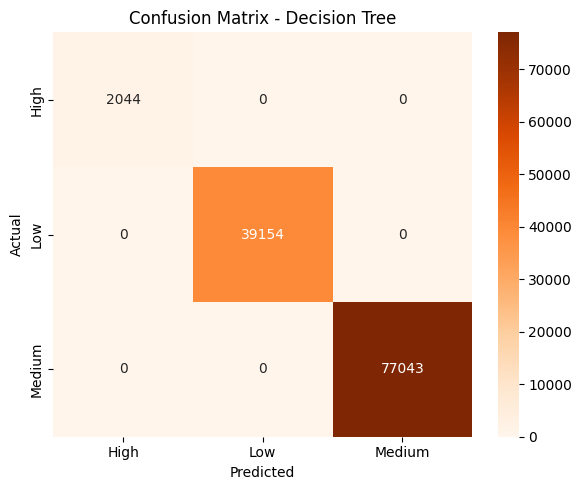

In [32]:
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the model
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Evaluation
print("Decision Tree Classifier")
print("Classification Report:\n", classification_report(y_test, pred))
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)

# Confusion matrix
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


## Random Forest

Random Forest Classifier:
Accuracy: 1.0
Precision: 1.0
Cohen Kappa Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2044
           1       1.00      1.00      1.00     39154
           2       1.00      1.00      1.00     77043

    accuracy                           1.00    118241
   macro avg       1.00      1.00      1.00    118241
weighted avg       1.00      1.00      1.00    118241

Confusion Matrix:
 [[ 2044     0     0]
 [    0 39154     0]
 [    0     0 77043]]


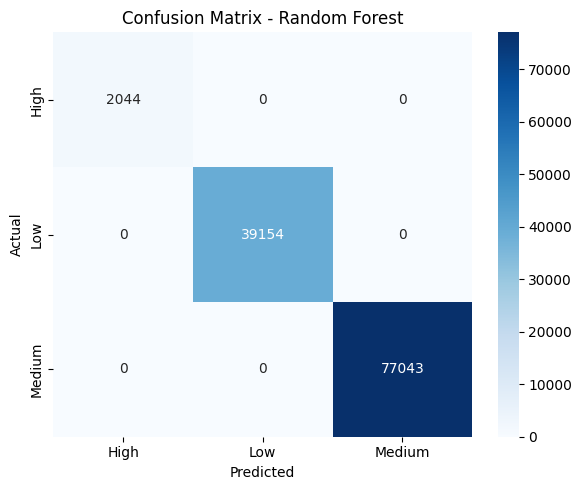

In [33]:
# Initialize and train the model
rdF = RandomForestClassifier(n_estimators=250, max_depth=50, random_state=45)
rdF.fit(X_train, y_train)

# Make predictions
pred = rdF.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
kappa = cohen_kappa_score(y_test, pred)
cm = confusion_matrix(y_test, pred)

# Print results
print("Random Forest Classifier:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Cohen Kappa Score:", kappa)
print("\nClassification Report:\n", classification_report(y_test, pred))
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


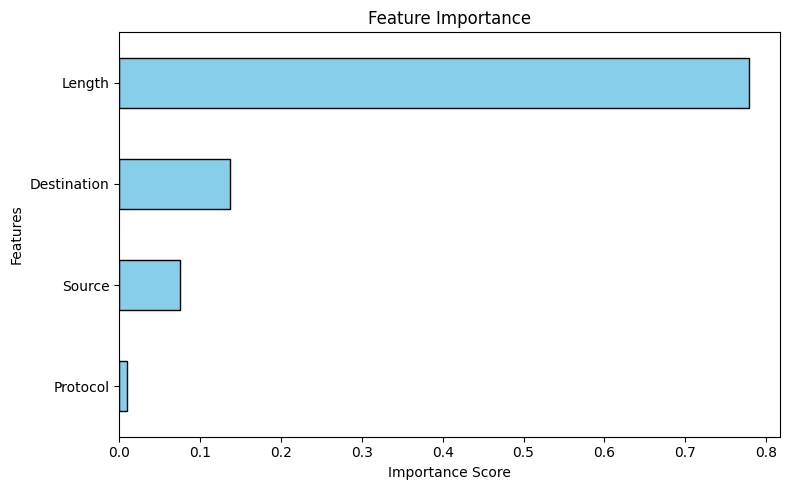

In [34]:
# Use rdF if you're using RandomForestClassifier, or clf for DecisionTreeClassifier
model = rdF  # or clf

# Create feature importance series
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)

# Plot
plt.figure(figsize=(8, 5))
feat_importances.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


## Recursive Feature Elimination with Cross-Validation

In [35]:
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from numpy import mean, std

# Initialize the classifier
model = DecisionTreeClassifier(random_state=42)

# RFECV for automatic feature selection
rfe = RFECV(estimator=model, scoring='accuracy', cv=5, n_jobs=-1)

# Pipeline: Feature selection + model training
pipeline = Pipeline(steps=[('feature_selection', rfe), ('classification', model)])

# Repeated Stratified K-Fold Cross Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

# Evaluate pipeline
scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# Output result
print('RFECV DecisionTree Accuracy: %.3f (±%.3f)' % (mean(scores), std(scores)))


RFECV DecisionTree Accuracy: 1.000 (±0.000)


In [36]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Initialize RFE with DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

# Fit RFE on training data
rfe.fit(X_train, y_train)

# Report feature selection results
print("Selected Features:\n")
for i in range(X_train.shape[1]):
    feature_name = X_train.columns[i]
    print(f"Feature: {feature_name:>12} | Selected: {rfe.support_[i]} | Rank: {rfe.ranking_[i]}")


Selected Features:

Feature:       Source | Selected: True | Rank: 1
Feature:  Destination | Selected: True | Rank: 1
Feature:     Protocol | Selected: True | Rank: 1
Feature:       Length | Selected: True | Rank: 1


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(
